# Term Paper: Football Player Analysis Using Python


Abstract:
Football is one of the most popular team sports in the world. Data analysis has been widely applied in the research of football palyer and team managements in recent years. From player aspects, data analysis can provide them a better understand of which kind of charasteristics is important for their career success. From team mangers aspect, data analysis can serve as a prowerful tool to evaluate the players and optimize wage structure of teams. Therefore, this project operated data analysis on football player dataset of FIFA19 and finish these jobs:
- 1.Football player data was collected and cleaned using pandas;
- 2.Players data was simply described based on different items using visualization;
- 3.Attacking fullback and defending fullback were contrast through RandomForest and self-modeling;
- 4.Important characteristics of Attacker were determined through LinearRegression, Lasso and Ridge. 

## Football Player Dataset

This project utilized a dataset downloaded from Kaggle(https://www.kaggle.com/karangadiya/fifa19). It contains nearly 90 attributes of 18000 players extracted from latest edition of FIFA19 database in Sofia(https://sofifa.com/).  It was scrapped by a project in Github.

Now we imported the data from the csv file.

In [1]:
import pandas as pd
workbook = pd.read_csv('data.csv')
workbook.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [2]:
print('Number of player:',len(workbook.index),'\n','Attributes:',len(workbook.columns))

Number of player: 18207 
 Attributes: 89


## Data Cleaning

In this project, wage of the football player is the main output of the model in the coming section. However,the string in the column 'Wage' contain unusual symbol, which need to be clean. Also, the unit of wage in the dataset is pound.

In [3]:
workbook['Wage'] = workbook['Wage'].str.replace('€','')
workbook['Wage'] = workbook['Wage'].str.replace('K','000').apply(int)

By observation of the dataset, it can be noticed that there are a large number of low-income football player(weekly income < 4K pounds). These low-income football player would not be considered in this project, since most of them are semi-professional players or players from lower leagues. Also, football player with too high income (> 40K pounds) would be neglect here, also.

In [4]:
workbook = workbook.loc[(workbook['Wage']>4000)&(workbook['Wage']<40000)]

In [5]:
print('Number of player:',len(workbook.index))

Number of player: 6225


## Basic Items Analysis

In this section, the distribution of wage, age, position and preferred foot was visualized. Also, the mean wage of player in different ages, positions and preferred foots are also visualized for discussions.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Wage Distribution

The wage of professional footballers has been one of the hottest topic. C.Ronaldo, L.Messi and Neymar, three of the world's most famous players, can earn more than 400K pounds a day. Other players from top leagues also earn a lot, which is often reported by the news. However, it should be noticed that the income of these top players was far more highest than the rest.
- Therefore, in this dataset, with the increasing wage level, the number of football players decreases. 
- The wage level with the most players is [4K,6K].

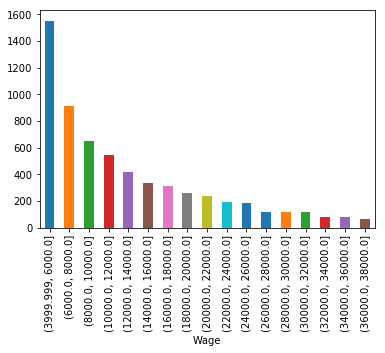

In [7]:
player_wage = pd.DataFrame({"Wage": []})
player_wage['Name'] = workbook['Name']
wage_bins = np.arange(4000,40000,2000)
player_wage['Wage'] = pd.cut(workbook['Wage'].astype(int), bins=wage_bins, include_lowest=True)
player_wage = player_wage.groupby(['Wage']).count()
player_wage['Name'].plot('bar')

### Position Distribution

In the next section, we would give prediction to wage of player from different positions. Here, the distribution of different position was shown below. Also, the mean wage of different postition was shown below also. However, the dataset is not large enough so that the sample for different positions is not enough. 
- Therefore, when considering the mean wage of different position, we neglected LAM,LF,RAM,RF,CF,LWB,RWB. 
- From the result of second figure, RCM,LS,RS are the three positions with highest mean income.

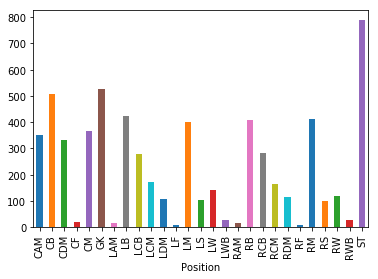

In [8]:
player_position = workbook.groupby(['Position']).count()
player_position['Name'].plot('bar')

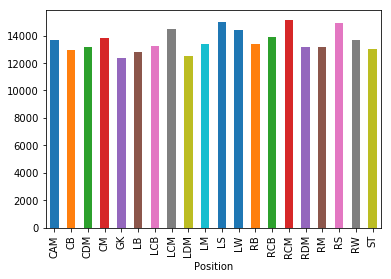

In [9]:
player_position_wk = workbook.loc[(workbook['Position']!='LAM')&(workbook['Position']!='LF')&
                                  (workbook['Position']!='RAM')&(workbook['Position']!='RF')&
                                 (workbook['Position']!='CF')&(workbook['Position']!='LWB')&(workbook['Position']!='RWB')]
player_position = player_position_wk.groupby(['Position'])['Wage'].mean()
player_position.plot('bar')

### Age Distribution

Here, the distribution of different ages and mean wage of player with different ages was shown below. 
- From the age distribution, it can be seen that the most players are between 23 and 30 years old. 
- Also, from the second figure, the player would meet its peak income near 30 years old, as we expected. 
- In the second figure, wage of player at 38 and 40 years old is also high, due to samples at these ages is less.

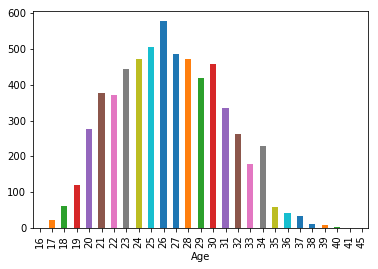

In [10]:
player_age = workbook.groupby(['Age']).count()
player_age['Name'].plot('bar')

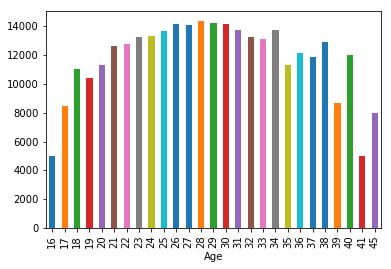

In [11]:
player_age_mean = workbook.groupby(['Age'])['Wage'].mean()
player_age_mean.plot('bar')

### Preferred Foot Distribution

Preferred foot is very important to professional player as well as coach. For example, left-foot players in left side are more likely to rush to the end and make crossings, while left-foot players in right side are more likely to make cut shots. 
- From the first figure, the number of right-foot players are nearly three times as the number of left-foot players. 
- However, Left-foot players are paid about the same as right-foot players, and it seems not to be affected by the number.

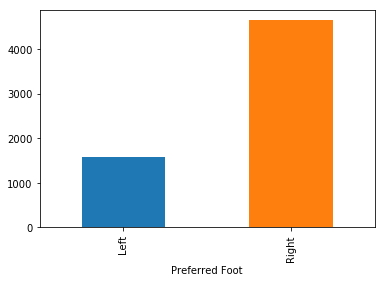

In [12]:
player_foot = workbook.groupby(['Preferred Foot']).count()
player_foot['Name'].plot('bar')

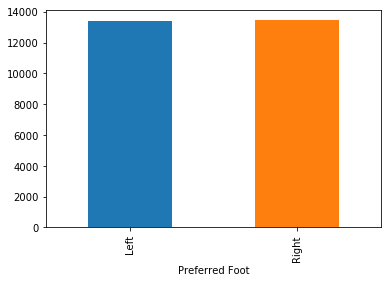

In [13]:
player_foot_mean = workbook.groupby(['Preferred Foot'])['Wage'].mean()
player_foot_mean.plot('bar')

## Attacking fullback vs Defending fullback

In traditional football tactics, a fullback's main responsibility is to mark the opposing side attacker on the side or flank and prevent the opposing player from making crossing. Therefore, defending ability was emphasized before. However, in modern football tactics, fullback is asked to participate into the attacking more by the coach so that attacking abilities like acceleration, crossing and dribbling are considered more. For example, attacking fullbacks like Alexander Arnold are more welcomed in some top fooball clubs. But defensive ability of attacking fullbacks like Alexander Arnold is relatively weak so that they are often targeted by opponents. In this section, RandomForest and self-modelling would be used to determined the importance of different abilities. 

In [14]:
Wingback = workbook.loc[(workbook['Position'] == 'LB')|(workbook['Position'] == 'RB')|
                       (workbook['Position'] == 'LWB')|(workbook['Position'] == 'RWB')]

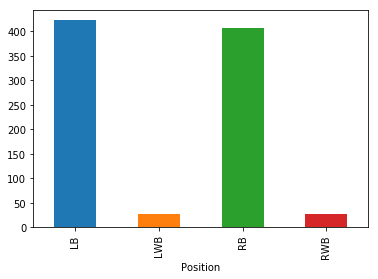

In [15]:
Wingback_group = Wingback.groupby(['Position']).count()
Wingback_group['Name'].plot('bar')

Three dataframes of wingback are created here, which contain different columns. "Wingback_stat_overall" contains basic information about the player, including age, overall, potential and wage. "Wingback_stat_pfm" contains information about player abilities, including attacking abilities and defending abilities.

In [16]:
Wingback_stat_overall = Wingback[['Age','Overall','Potential','Wage',]]
Wingback_stat = Wingback[["Age","Overall","Wage", 
                          "Crossing", 'Dribbling','BallControl', 'Acceleration','SprintSpeed', 'Agility', 'LongShots','Vision',
                         'Jumping','Stamina', 'Strength','Interceptions', 'Positioning','Marking', 'StandingTackle', 'SlidingTackle']]
Wingback_stat_pfm = Wingback_stat.drop(columns=["Overall","Wage","Age"],axis=1)
Wingback_stat_attack = Wingback_stat_pfm[["Crossing", 'Dribbling','BallControl', 'Acceleration','SprintSpeed', 'Agility', 'LongShots','Vision']]
Wingback_stat_defend = Wingback_stat_pfm[['Jumping','Stamina', 'Strength','Interceptions', 'Positioning','Marking', 'StandingTackle', 'SlidingTackle']]

### Self Modelling

First, heat map was shown to see their correlation.From this figure, it can be seen that:
- Wage of the football player is relatively related to crossing, dribbling, ball control, interceptions, marking, standing tackle and sliding tackle. However, crossing, dribbling and ball control are attacking abilities, while interceptions, marking, standing tackle and sliding tackle are defending abilities.
- Acceleration and sprint speed are highly related to age. Also, interceptions is related to age since making interceptions need high speed.

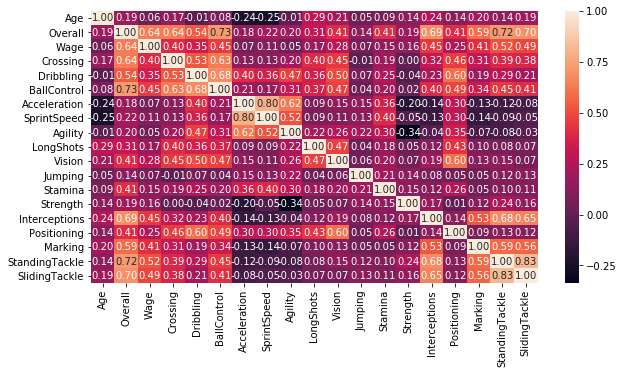

In [17]:
plt.figure(figsize=(10, 5))
sns.heatmap(Wingback_stat.corr(), annot=True, fmt=".2f")

Here, two new parameter to describe the player's attacking and defending abilities are defined here.
- Attacking = Crossing + Dribbling + BallControl + Acceleration + SprintSpeed + Agility + LongShots + Vision
- Defending = Jumping + Stamina + Strength + Interceptions + Positioning + Marking + StandingTackle+ SlidingTackle

In [18]:
Wingback_overall_pfm = pd.DataFrame({"Attacking": [], "Defending": []})
Wingback_overall_pfm["Attacking"] = Wingback_stat_attack.apply(lambda x: x.sum(), axis=1)
Wingback_overall_pfm["Defending"] = Wingback_stat_defend.apply(lambda x: x.sum(), axis=1)

In [19]:
Wingback_overall_pfm.mean()

Attacking    532.652322
Defending    545.707814
dtype: float64

### Random Forest

Here, after calculating the self-defined "Attacking" and "Defending" parameters of wingback. Random Forest would be built up to check their correlation with wage level and predict their wage of wingback based on these two parameters.
- From the random foreste result, defending abilities(0.55581) are little higher than attacking abilities(0.44419). Therefore, defending abilities are still more important than attacking abilities for wingback. However, the gap is not so large, meaning that attacking should also be considered.
- The results using random forest to predict the wingback income based on attacking and defending parameters are not good. Maybe more input parameters are required here.

In [20]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

D:\anaconda\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
X_train,X_test,y_train,y_test=train_test_split(Wingback_overall_pfm,Wingback_stat.Wage,
                                               test_size=0.1,random_state=3)

In [22]:
Wingback_RF = RandomForestRegressor(random_state=0, n_estimators=100)
Wingback_RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
Wingback_RF_score = Wingback_RF.score(X_train,y_train)
print("coefficient of determination R^2 of the prediction:",Wingback_RF_score)
y_predicted = Wingback_RF.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

coefficient of determination R^2 of the prediction: 0.8709922399592573
Mean squared error: 74317824.60
Test Variance score: 0.11


In [24]:
Wingback_RF_best_importances = pd.DataFrame({'items':Wingback_overall_pfm.columns,'importances':Wingback_RF.feature_importances_})
Wingback_RF_best_importances

,importances,items
0,0.44419,Attacking
1,0.55581,Defending


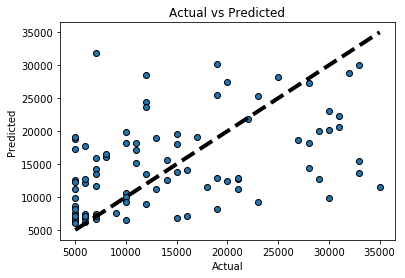

In [25]:
def Actual_vs_predict(y_predicted):
    from sklearn.model_selection import cross_val_predict
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title("Actual vs Predicted")
    plt.show()
Actual_vs_predict(Wingback_RF.predict(X_test))

RandomForest performance to predict the wage based on attacking and defending parameters is not good. Therefore, original parameters were used as input to predict again. The results is better after but it's not enough.

coefficient of determination R^2 of the prediction: 0.9141714134807611
Mean squared error: 74317824.60
Test Variance score: 0.11


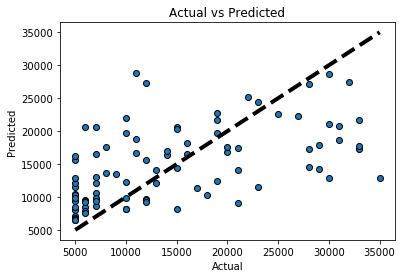

In [26]:
X_train,X_test,y_train,y_test=train_test_split(Wingback_stat_pfm,Wingback_stat.Wage,
                                               test_size=0.1,random_state=3)
Wingback_RF = RandomForestRegressor(random_state=0, n_estimators=100)
Wingback_RF.fit(X_train, y_train)
Wingback_RF_score = Wingback_RF.score(X_train,y_train)
print("coefficient of determination R^2 of the prediction:",Wingback_RF_score)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))
y_predicted = Wingback_RF.predict(X_test)
Actual_vs_predict(Wingback_RF.predict(X_test))

## Important characteristics of Attacker

Forward is located in the front field, is the team's first line of attack, the main task is to attack to score. There are wingers and centre forwards.The main task is to attack, break through the other defense line, try to score goals.When defending, we should actively block, steal, intercept, delay the first pass of the other party's attack, or retreat to the midfield in time, and form a tight midfield defense together with the avant-garde.With the development of the tatics, there are many types of strikers in modern football.Therefore, it's meaningful to determine which characteristics is important to attackers. Here we use LinearRegression, Ridge and Lasso.The result shows that:
- Finishing, ShortPassing, Dribbling, BallControl and ShotPower are the top 5 important characteristics of attackers

In [27]:
Attacker = workbook.loc[(workbook['Position'] == 'LW')|(workbook['Position'] == 'RF')|
                        (workbook['Position'] == 'CF')|(workbook['Position'] == 'ST')|
                        (workbook['Position'] == 'LW')|(workbook['Position'] == 'RW')|
                        (workbook['Position'] == 'CAM')]

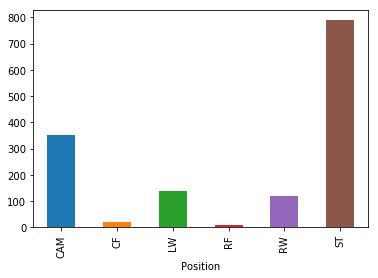

In [28]:
Attacker_group = Attacker.groupby(['Position']).count()
Attacker_group['Name'].plot('bar')

In [29]:
Attacker_stat_overall = Attacker[['Age','Overall','Potential','Wage',]]
Attacker_stat = Attacker[["Age","Overall","Wage", "Crossing", "Finishing",
                           "HeadingAccuracy","ShortPassing","Volleys","Dribbling",
                              "LongPassing","BallControl","Acceleration","SprintSpeed",
                             "Agility","Balance","ShotPower","Stamina","Strength"]]
Attacker_stat_attack = Attacker_stat.drop(columns=["Overall","Wage","Age"],axis=1)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(Attacker_stat_attack,Attacker_stat.Wage,
                                               test_size=0.1,random_state=3)

### LinearRegression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV
Attacker_linear_model = LinearRegression()
Attacker_linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
Attacker_linear_model_coef = pd.DataFrame({'items':Attacker_stat_attack.columns,'coef':Attacker_linear_model.coef_})
Attacker_linear_model_coef

,coef,items
0,45.365138,Crossing
1,330.855708,Finishing
2,13.889559,HeadingAccuracy
3,244.242426,ShortPassing
4,-26.033671,Volleys
5,136.924460,Dribbling
6,-54.243853,LongPassing
7,279.350695,BallControl
8,17.876306,Acceleration
9,53.175689,SprintSpeed


In [33]:
Attacker_linear_model_predict = Attacker_linear_model.predict(X_test)
Attacker_linear_model_RMSE = np.sqrt(mean_squared_error(y_test,Attacker_linear_model_predict))
Attacker_linear_model_RMSE

7610.34124406333

### Lasso

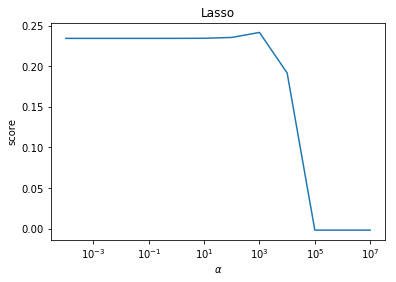

In [34]:
#Select the best parameters_alpha
alphas = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000,10000000]
scores = []
for i, alpha in enumerate(alphas):
    Attacker_lasso_model = Lasso(alpha=alpha)
    Attacker_lasso_model.fit(X_train, y_train)
    scores.append(Attacker_lasso_model.score(X_test, y_test))

fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.plot(alphas, scores)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"score")
ax.set_xscale('log')
ax.set_title("Lasso")
plt.show()

In [35]:
Attacker_lasso_model_cv = LassoCV(alphas = alphas, normalize=True, cv = 10, max_iter=10000)
Attacker_lasso_model_cv.fit(X_train, y_train)

LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000],
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=10000,
    n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [36]:
lasso_best_alpha = Attacker_lasso_model_cv.alpha_
Attacker_lasso_model_best = Lasso(alpha = lasso_best_alpha, normalize=True, max_iter=10000)
Attacker_lasso_model_best.fit(X_train, y_train)
Attacker_lasso_model_best_predict = Attacker_lasso_model_best.predict(X_test)
Attacker_lasso_model_RMSE = np.sqrt(mean_squared_error(y_test,Attacker_lasso_model_best_predict))
print('best_alpha:',lasso_best_alpha,'\n','RMSE:',Attacker_lasso_model_RMSE)

best_alpha: 1.0 
 RMSE: 7594.271397453193


In [37]:
Attacker_lasso_model_best_coef = pd.DataFrame({'items':Attacker_stat_attack.columns,'coef':Attacker_lasso_model_best.coef_})
Attacker_lasso_model_best_coef

,coef,items
0,34.280200,Crossing
1,327.676786,Finishing
2,8.521516,HeadingAccuracy
3,222.930893,ShortPassing
4,-12.134938,Volleys
5,138.675694,Dribbling
6,-37.889414,LongPassing
7,269.033951,BallControl
8,6.342132,Acceleration
9,51.508027,SprintSpeed


### Ridge

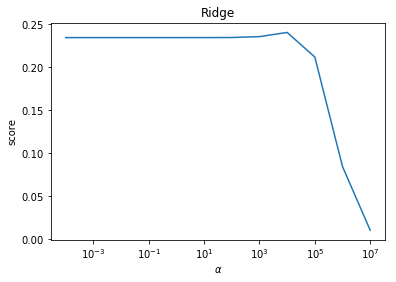

In [38]:
scores = []
for i, alpha in enumerate(alphas):
     Attacker_ridge_model = Ridge(alpha=alpha)
     Attacker_ridge_model.fit(X_train, y_train)
     scores.append(Attacker_ridge_model.score(X_test, y_test))

fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.plot(alphas, scores)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"score")
ax.set_xscale('log')
ax.set_title("Ridge")
plt.show()

In [39]:
Attacker_ridge_model_cv = RidgeCV(alphas = alphas, normalize=True, cv = 10)
Attacker_ridge_model_cv.fit(X_train, y_train)

RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000],
    cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [40]:
ridge_best_alpha = Attacker_ridge_model_cv.alpha_
Attacker_ridge_model_best = Ridge(alpha = ridge_best_alpha, normalize=True, max_iter=10000)
Attacker_ridge_model_best.fit(X_train, y_train)
Attacker_ridge_model_best_predict = Attacker_ridge_model_best.predict(X_test)
Attacker_ridge_model_RMSE = np.sqrt(mean_squared_error(y_test,Attacker_ridge_model_best_predict))
print('best_alpha:',ridge_best_alpha,'\n','RMSE:',Attacker_ridge_model_RMSE)

best_alpha: 0.1 
 RMSE: 7573.401432070582


In [41]:
Attacker_ridge_model_best_coef = pd.DataFrame({'items':Attacker_stat_attack.columns,'coef':Attacker_ridge_model_best.coef_})
Attacker_ridge_model_best_coef

,coef,items
0,36.720095,Crossing
1,291.173323,Finishing
2,19.965404,HeadingAccuracy
3,192.940736,ShortPassing
4,-3.398556,Volleys
5,149.581436,Dribbling
6,-25.799233,LongPassing
7,253.581042,BallControl
8,22.235373,Acceleration
9,39.219990,SprintSpeed


## Conclusion

- For the wage, the wage level with the most players is [4K,6K].RCM,LS,RS are the three positions with highest mean income. The player would meet its peak income near 30 years old from the distribution.
- The number of right-foot players are nearly three times as the number of left-foot players. However, Left-foot players are paid about the same as right-foot players, and it seems not to be affected by the number.
- From result of random forest, defending abilities(0.55581) are little higher than attacking abilities(0.44419). Therefore, defending abilities are still more important than attacking abilities for wingback. However, the gap is not so large, meaning that attacking should also be considered.
- From result of LinearRegression, Lasso and Ridge, Finishing, ShortPassing, Dribbling, BallControl and ShotPower are the top 5 important characteristics of attackers.